# MINIMIZING CHURN OF SUBSCRIPTION PRODUCT THROUGH ANALYSIS OF FINANCIAL HABITS

<p>Subscriptiton products often are the main source of revenue for companies across all industries. These products can come in the form of a "one size fits" overcompassing subscription, or in multi-level memberships. Regardless of how they structure their memberships, or what industry they are in, comapnies almost try to minimize customer churn (a.k.a. subscription cancellations). To retain their customers, these companies first need to identify behavioral patterns that act as catalyst in disengagement with the product.</p>
* <b>Market:</b> The target audience is the entirety of a company's subscription base. they are the ones comapnies want to keep

* <b>Product:</b> The subscription product that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgetten.

* <b>Goal:</b> The objective of this model is to predict which users are likely to churn, so that the comapny can focus on re-engaging these users with the product. These efforts can be email reminders about the benefits of the product, especially focusing on features that are new or that the user has shown to value.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("churn_data.csv")

In [4]:
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


Now our task is to find out users who are all gonna churn or cancel the subcription...

In [5]:
df.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

**Now lets check is there any nan values in our dataset**

In [6]:
df.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

rewards_earned, credit_score and age columns have na's so lets clean the data...

In [7]:
df.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

as we can see that credit_score and rewards_earned have more null values.... i don't think these two columns are useful for our model building process so i'm just going to get rid of them...

In [8]:
df=df[pd.notnull(df["age"])]
df=df.drop(columns=["credit_score","rewards_earned"])

so now i guess our dataframe is clean... umm lets move forward

In [9]:
df2=df.copy().drop(columns=["user","churn"])

In [10]:
df2.head()

,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,37.0,na,0,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,28.0,R,0,0,1,0,0,96,0,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,35.0,R,47,2,86,47,0,285,0,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,26.0,R,26,3,38,25,0,74,0,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,27.0,na,0,0,2,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [11]:
df2.shape

(26996, 27)

In [12]:
# for i in range(1,df2.shape[1]+1):
#     plt.subplot(7,4,i)
#     f=plt.gca()
#     f.set_title(df2.columns.values[i-1])
#     vals=np.size(df2.iloc[:,i-1].unique())
    
#     plt.hist(df2.iloc[:,i-1],bins=vals)

In [13]:
df2.columns

Index(['age', 'housing', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'payment_type',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month',
       'reward_rate', 'is_referred'],
      dtype='object')

As we can see that if a customer have any loan waiting is less likely to churn.....

In [14]:
df[df2["waiting_4_loan"]==1]["churn"].value_counts()

0    27
1     8
Name: churn, dtype: int64

this is different there are few customers who have not not churn even after cancelling the loan... vice versa

In [15]:
df[df2["cancelled_loan"]==1]["churn"].value_counts()

1    274
0    234
Name: churn, dtype: int64

In [16]:
df[df2["received_loan"]==1]["churn"].value_counts()

1    292
0    199
Name: churn, dtype: int64

In [17]:
df[df2["rejected_loan"]==1]["churn"].value_counts()

1    107
0     25
Name: churn, dtype: int64

In [18]:
df[df2["left_for_one_month"]==1]["churn"].value_counts()

1    266
0    222
Name: churn, dtype: int64

In [19]:
df[df2["left_for_two_month_plus"]==1]["churn"].value_counts()

0    2719
1    1964
Name: churn, dtype: int64

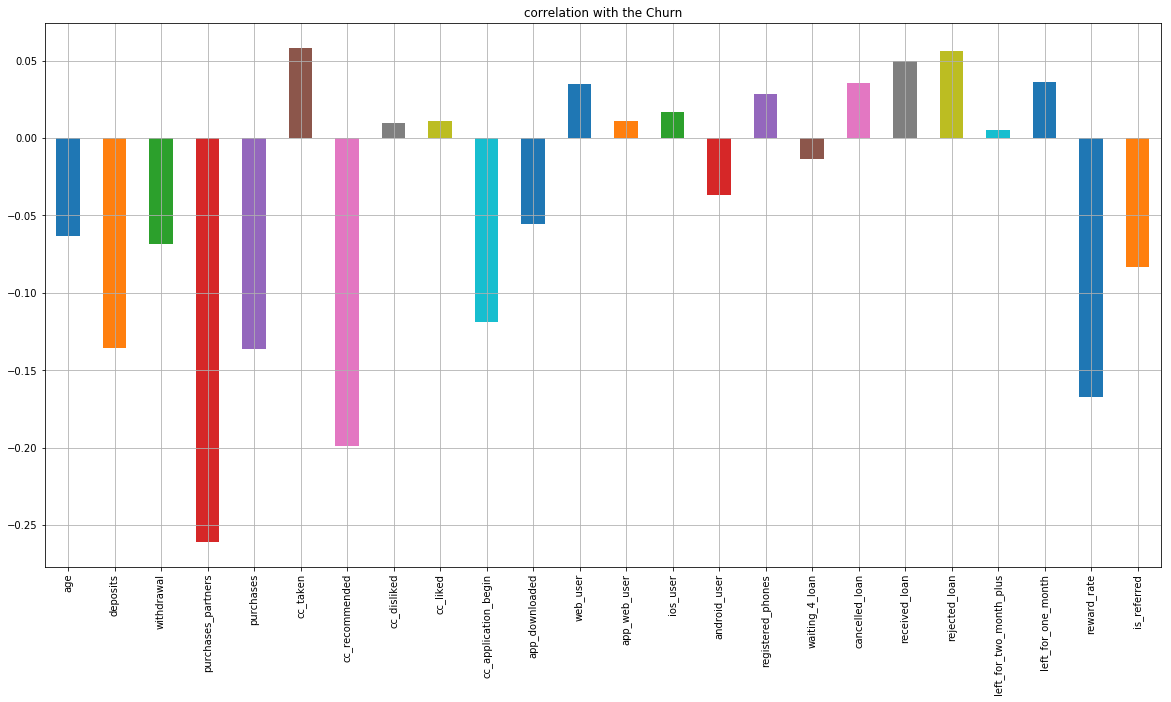

In [20]:
df.drop(columns=["churn","user","housing","payment_type","zodiac_sign"]).corrwith(df["churn"]).plot.bar(figsize=(20,10),title="correlation with the Churn",grid=True)

from the above plot we can say lot of things if a customer's **age** is more and **deposits, withdrawal, purchases_partners.. etc is more he is less likely to churn** 

In [21]:
corr=df.drop(columns=["churn","user"]).corr()

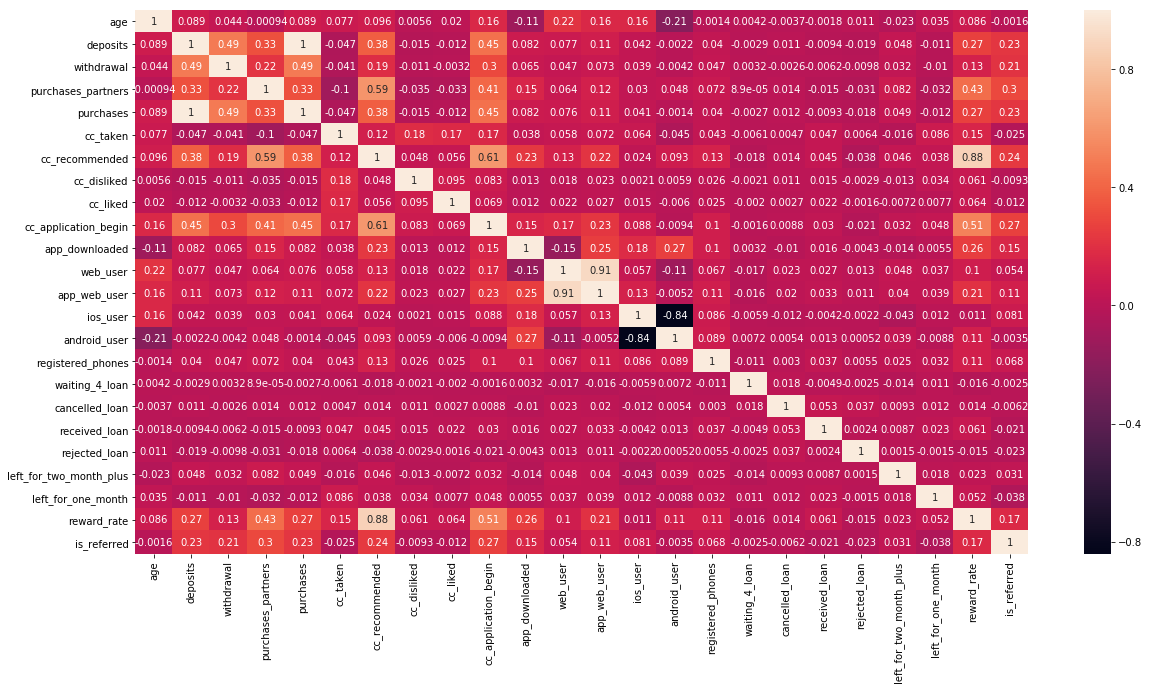

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [23]:
df=df.drop(columns=["app_web_user"])

In [24]:
df.to_csv("new_churn_data3.csv",index=False)

In [27]:
df3=pd.read_csv("new_churn_data3.csv")

In [28]:
df3.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [29]:
user_id=df3["user"]

In [30]:
df3=df3.drop(columns=["user"])

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26996 entries, 0 to 26995
Data columns (total 27 columns):
churn                      26996 non-null int64
age                        26996 non-null float64
housing                    26996 non-null object
deposits                   26996 non-null int64
withdrawal                 26996 non-null int64
purchases_partners         26996 non-null int64
purchases                  26996 non-null int64
cc_taken                   26996 non-null int64
cc_recommended             26996 non-null int64
cc_disliked                26996 non-null int64
cc_liked                   26996 non-null int64
cc_application_begin       26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones          26996 non-null int64
payment_type               26996 non-null object
waiting_4_loan         

we have few categorical columns so lets fix it...

In [32]:
df3=pd.get_dummies(df3)

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26996 entries, 0 to 26995
Data columns (total 45 columns):
churn                        26996 non-null int64
age                          26996 non-null float64
deposits                     26996 non-null int64
withdrawal                   26996 non-null int64
purchases_partners           26996 non-null int64
purchases                    26996 non-null int64
cc_taken                     26996 non-null int64
cc_recommended               26996 non-null int64
cc_disliked                  26996 non-null int64
cc_liked                     26996 non-null int64
cc_application_begin         26996 non-null int64
app_downloaded               26996 non-null int64
web_user                     26996 non-null int64
ios_user                     26996 non-null int64
android_user                 26996 non-null int64
registered_phones            26996 non-null int64
waiting_4_loan               26996 non-null int64
cancelled_loan               26996 non-

there are few na columns lets get rid of them

In [34]:
df3=df3.drop(columns=["housing_na","payment_type_na","zodiac_sign_na"])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X=df3.drop(columns=["churn"])
y=df3["churn"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
y_train.value_counts()

0    11083
1     7814
Name: churn, dtype: int64

our labels are not balanced so lets balance it

In [39]:
p_index=y_train[y_train.values==1].index

In [40]:
n_index=y_train[y_train.values==0].index

In [41]:
len(p_index)

7814

In [42]:
len(n_index)

11083

In [43]:
import random
if len(p_index) > len(n_index):
    hig=p_index
    low=n_index
else:
    hig=n_index
    low=p_index

random.seed(0)

hig=np.random.choice(hig,size=len(low))
low=np.asarray(low)

In [44]:
new_index=np.concatenate((low,hig))

In [45]:
X_train=X_train.loc[new_index]
y_train=y_train.loc[new_index]

lets normalize our dataset

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc_X=StandardScaler()

In [48]:
Xtrain2=pd.DataFrame(sc_X.fit_transform(X_train))
Xtest2=pd.DataFrame(sc_X.fit_transform(X_test))

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_p

the standard scaler deletes all index and columns thats why im using new dataframe to store the normalized data..

In [49]:
Xtrain2.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.988535,-0.354922,-0.292809,-0.629266,-0.354637,-0.164083,-1.021854,-0.072623,-0.07063,-0.651805,...,3.219599,-0.154425,-0.298809,-0.310598,-0.290084,-0.297792,-0.290861,-0.297027,-0.298936,-0.312698
1,-0.019742,-0.125965,-0.292809,0.452387,-0.120786,-0.164083,0.064414,-0.072623,-0.07063,-0.081193,...,-0.310598,-0.154425,-0.298809,-0.310598,-0.290084,-0.297792,-0.290861,-0.297027,-0.298936,-0.312698
2,-0.927192,-0.240443,0.726348,-0.533119,-0.237712,-0.164083,-0.381528,-0.072623,-0.07063,0.163356,...,-0.310598,-0.154425,-0.298809,-0.310598,-0.290084,-0.297792,-0.290861,-0.297027,-0.298936,-0.312698
3,-0.523881,-0.354922,-0.292809,-0.509082,-0.354637,-0.164083,-0.838904,-0.072623,-0.07063,-0.651805,...,-0.310598,-0.154425,-0.298809,-0.310598,-0.290084,-0.297792,-0.290861,3.366697,-0.298936,-0.312698
4,0.786880,-0.354922,-0.292809,-0.629266,-0.354637,-0.164083,0.944863,-0.072623,-0.07063,0.081839,...,3.219599,-0.154425,-0.298809,-0.310598,-0.290084,-0.297792,-0.290861,-0.297027,-0.298936,-0.312698


In [50]:
Xtrain2.columns=X_train.columns.values
Xtest2.columns=X_test.columns.values

Xtrain2.index=X_train.index.values
Xtest2.index=X_test.index.values

In [51]:
Xtrain2.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
6635,0.988535,-0.354922,-0.292809,-0.629266,-0.354637,-0.164083,-1.021854,-0.072623,-0.07063,-0.651805,...,3.219599,-0.154425,-0.298809,-0.310598,-0.290084,-0.297792,-0.290861,-0.297027,-0.298936,-0.312698
23087,-0.019742,-0.125965,-0.292809,0.452387,-0.120786,-0.164083,0.064414,-0.072623,-0.07063,-0.081193,...,-0.310598,-0.154425,-0.298809,-0.310598,-0.290084,-0.297792,-0.290861,-0.297027,-0.298936,-0.312698
6601,-0.927192,-0.240443,0.726348,-0.533119,-0.237712,-0.164083,-0.381528,-0.072623,-0.07063,0.163356,...,-0.310598,-0.154425,-0.298809,-0.310598,-0.290084,-0.297792,-0.290861,-0.297027,-0.298936,-0.312698
24483,-0.523881,-0.354922,-0.292809,-0.509082,-0.354637,-0.164083,-0.838904,-0.072623,-0.07063,-0.651805,...,-0.310598,-0.154425,-0.298809,-0.310598,-0.290084,-0.297792,-0.290861,3.366697,-0.298936,-0.312698
1946,0.786880,-0.354922,-0.292809,-0.629266,-0.354637,-0.164083,0.944863,-0.072623,-0.07063,0.081839,...,3.219599,-0.154425,-0.298809,-0.310598,-0.290084,-0.297792,-0.290861,-0.297027,-0.298936,-0.312698


In [52]:
X_train=Xtrain2
X_test=Xtest2

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lm=LogisticRegression(random_state=0)
lm.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
predict=lm.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score

In [57]:
cm=confusion_matrix(y_test,predict)

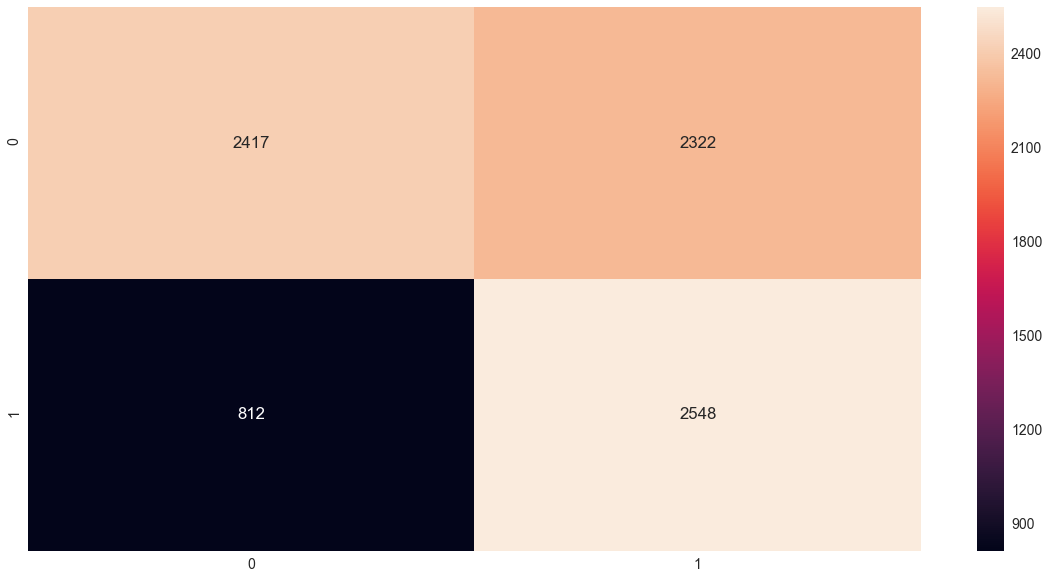

In [58]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,fmt="g")

In [59]:
accuracy_score(y_test,predict)

0.6130386467465119

In [60]:
precision_score(y_test,predict)

0.5232032854209445

In [61]:
recall_score(y_test,predict)

0.7583333333333333

In [62]:
f1_score(y_test,predict)

0.6191980558930741

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
cvs=cross_val_score(estimator=lm,X=X_train,y=y_train,cv=10)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-pa

In [65]:
cvs

array([0.64897698, 0.66815857, 0.62531969, 0.63171355, 0.63508323,
       0.64020487, 0.63316261, 0.63764405, 0.6581306 , 0.66645327])

In [66]:
cvs.mean()

0.6444847415111455

In [67]:
pd.concat([pd.DataFrame(X_train.columns, columns=["features"]),
           pd.DataFrame(np.transpose(lm.coef_),columns=["Coef"])],axis=1)

,features,Coef
0,age,-0.166022
1,deposits,0.017034
2,withdrawal,0.071356
3,purchases_partners,-0.744910
4,purchases,-0.159170
5,cc_taken,0.091657
6,cc_recommended,0.145857
7,cc_disliked,-0.002839
8,cc_liked,0.003645
9,cc_application_begin,-0.003610


In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [69]:
lrm=LogisticRegression()
rfe=RFE(lrm,20)
rfe=rfe.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-pa

In [70]:
print(rfe.support_)

[ True False  True  True  True  True  True False False False False  True
  True False  True False  True  True  True  True  True  True False False
  True  True False  True  True False False False  True False False False
 False False False False False]


In [71]:
X_train.columns[rfe.support_]

Index(['age', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'web_user', 'ios_user', 'registered_phones',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'zodiac_sign_Capricorn'],
      dtype='object')

In [72]:
lm=LogisticRegression(random_state=0)
lm.fit(X_train[X_train.columns[rfe.support_]],y_train)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
predict2=lm.predict(X_test[X_test.columns[rfe.support_]])

In [74]:
accuracy_score(y_test,predict2)

0.6100753179404865

In [75]:
print(precision_score(y_test,predict))

print(recall_score(y_test,predict))

print(f1_score(y_test,predict))

0.5232032854209445
0.7583333333333333
0.6191980558930741


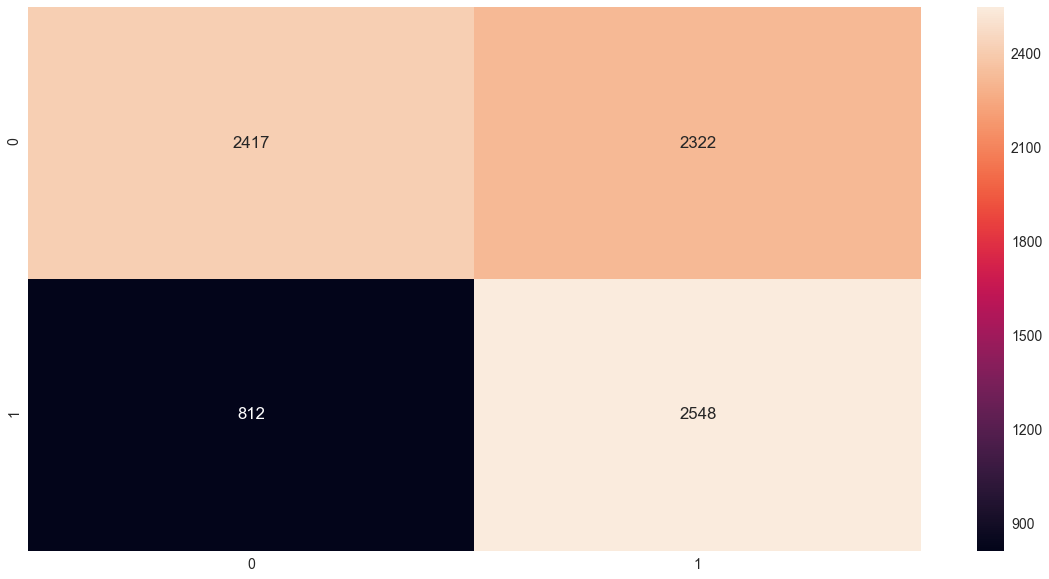

In [76]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,fmt="g")

In [77]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_],columns=["Features"]),
          pd.DataFrame(np.transpose(lm.coef_),columns=["coeff"])],axis=1)

,Features,coeff
0,age,-0.171158
1,withdrawal,0.072297
2,purchases_partners,-0.740608
3,purchases,-0.144048
4,cc_taken,0.090517
5,cc_recommended,0.144463
6,web_user,0.125710
7,ios_user,0.057992
8,registered_phones,0.081236
9,cancelled_loan,0.058458


In [78]:
final=pd.concat([y_test,user_id],axis=1).dropna()

In [79]:
final["predicted_churn"]=predict2

In [80]:
final=final[["user","churn","predicted_churn"]].reset_index()

In [81]:
final

,index,user,churn,predicted_churn
0,4,61353,1.0,1
1,7,67679,0.0,0
2,8,21269,0.0,0
3,12,20839,0.0,1
4,16,30419,1.0,0
5,18,69531,0.0,0
6,22,25997,0.0,0
7,29,8381,0.0,1
8,31,28827,0.0,1
9,32,25823,1.0,0
